# Collect the Data

## Use NumPy module to generate over 1500 random latitude and longitude pairs

In [1]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low = -90, high = 90, size = 1500)
lngs = np.random.uniform(low = -180, high = 180, size = 1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
# Add latitude and longitude tuples to list
coordinates = list(lats_lngs)

## Match coordinates to the nearest city using Python's citipy module

In [4]:
# Import citipy module
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

## Use the OpenWeatherMap API to request the current weather data from each unique city in your list. Parse the JSON data from the API request, and obtain the following data for each city:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed

## Then add the data to a pandas DataFrame

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call. Units = Imperial
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=114bba6fa0eed51bc8e39279807587ea


In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city. replace method used to take out blank spaces and concatenate city names.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | saint anthony
Processing Record 3 of Set 1 | sobolevo
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | lorengau
Processing Record 6 of Set 1 | sanming
Processing Record 7 of Set 1 | rio tercero
Processing Record 8 of Set 1 | villanueva
Processing Record 9 of Set 1 | san patricio
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | pozo colorado
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 21 of Set 1 | pangody
Processing Record 22 

Processing Record 37 of Set 4 | svetlyy
Processing Record 38 of Set 4 | zhifang
Processing Record 39 of Set 4 | kendari
Processing Record 40 of Set 4 | atarfe
Processing Record 41 of Set 4 | hobart
Processing Record 42 of Set 4 | oshakati
Processing Record 43 of Set 4 | tome-acu
City not found. Skipping...
Processing Record 44 of Set 4 | bredasdorp
Processing Record 45 of Set 4 | hailar
Processing Record 46 of Set 4 | mocambique
City not found. Skipping...
Processing Record 47 of Set 4 | saldanha
Processing Record 48 of Set 4 | diu
Processing Record 49 of Set 4 | malabo
Processing Record 50 of Set 4 | kuah
Processing Record 1 of Set 5 | brae
Processing Record 2 of Set 5 | hobyo
Processing Record 3 of Set 5 | bam
Processing Record 4 of Set 5 | nanortalik
Processing Record 5 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 6 of Set 5 | sorada
Processing Record 7 of Set 5 | upernavik
Processing Record 8 of Set 5 | elliot lake
Processing Record 9 of Set 5 | cidreira
Pr

Processing Record 29 of Set 8 | fontem
Processing Record 30 of Set 8 | sistranda
Processing Record 31 of Set 8 | matara
Processing Record 32 of Set 8 | barabai
Processing Record 33 of Set 8 | matagami
Processing Record 34 of Set 8 | kindu
Processing Record 35 of Set 8 | chapais
Processing Record 36 of Set 8 | lashio
Processing Record 37 of Set 8 | orlik
Processing Record 38 of Set 8 | san ramon
Processing Record 39 of Set 8 | libres
Processing Record 40 of Set 8 | sakakah
Processing Record 41 of Set 8 | nizwa
Processing Record 42 of Set 8 | hammerfest
Processing Record 43 of Set 8 | shenkursk
Processing Record 44 of Set 8 | khromtau
Processing Record 45 of Set 8 | keelung
Processing Record 46 of Set 8 | honiara
Processing Record 47 of Set 8 | husavik
Processing Record 48 of Set 8 | aklavik
Processing Record 49 of Set 8 | kodino
Processing Record 50 of Set 8 | lonevag
Processing Record 1 of Set 9 | sitka
Processing Record 2 of Set 9 | nkan
Processing Record 3 of Set 9 | havelock
Process

Processing Record 19 of Set 12 | rundu
Processing Record 20 of Set 12 | urucurituba
Processing Record 21 of Set 12 | eldikan
City not found. Skipping...
Processing Record 22 of Set 12 | mafinga
Processing Record 23 of Set 12 | inuvik
Processing Record 24 of Set 12 | alugan
Processing Record 25 of Set 12 | taoudenni
Processing Record 26 of Set 12 | wagar
Processing Record 27 of Set 12 | cherskiy
Processing Record 28 of Set 12 | coihaique
Processing Record 29 of Set 12 | anshun
Processing Record 30 of Set 12 | marienburg
Processing Record 31 of Set 12 | angra
City not found. Skipping...
Processing Record 32 of Set 12 | salinopolis
Processing Record 33 of Set 12 | ligayan
Processing Record 34 of Set 12 | san jose
Processing Record 35 of Set 12 | ler
Processing Record 36 of Set 12 | berlevag
Processing Record 37 of Set 12 | peabiru
Processing Record 38 of Set 12 | barcelos
Processing Record 39 of Set 12 | kiruna
Processing Record 40 of Set 12 | karak
Processing Record 41 of Set 12 | alanya

In [14]:
# Check to ensure data from at least 500 cities has been collected.
len(city_data)

551

In [16]:
# Convert city_data to a dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.7900,-152.4072,37.40,87,20,11.50,US,2021-01-11 21:38:50
1,Saint Anthony,45.0205,-93.2180,36.00,69,1,9.22,US,2021-01-11 21:38:50
2,Sobolevo,54.4299,31.8996,16.23,97,100,6.26,RU,2021-01-11 21:38:51
3,Tiksi,71.6872,128.8694,-36.06,82,80,8.32,RU,2021-01-11 21:38:51
4,Lorengau,-2.0226,147.2712,84.04,73,100,8.21,PG,2021-01-11 21:38:51
5,Sanming,26.2486,117.6186,32.18,86,0,1.54,CN,2021-01-11 21:38:52
6,Rio Tercero,-32.1730,-64.1141,73.00,68,15,4.00,AR,2021-01-11 21:38:52
7,Villanueva,15.3167,-88.0000,82.99,65,40,9.22,HN,2021-01-11 21:38:52
8,San Patricio,28.0170,-97.5169,51.80,58,75,13.80,US,2021-01-11 21:38:53
9,Nikolskoye,59.7035,30.7861,10.99,85,40,8.95,RU,2021-01-11 21:38:53


In [17]:
# reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2021-01-11 21:38:50,57.7900,-152.4072,37.40,87,20,11.50
1,Saint Anthony,US,2021-01-11 21:38:50,45.0205,-93.2180,36.00,69,1,9.22
2,Sobolevo,RU,2021-01-11 21:38:51,54.4299,31.8996,16.23,97,100,6.26
3,Tiksi,RU,2021-01-11 21:38:51,71.6872,128.8694,-36.06,82,80,8.32
4,Lorengau,PG,2021-01-11 21:38:51,-2.0226,147.2712,84.04,73,100,8.21


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

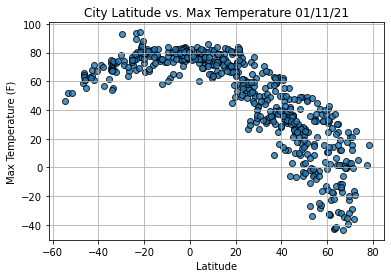

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

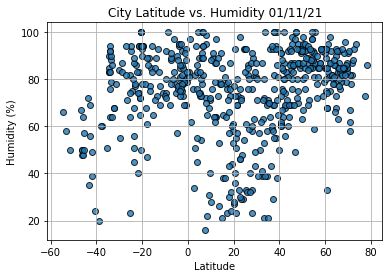

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

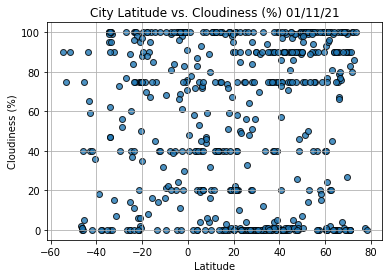

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

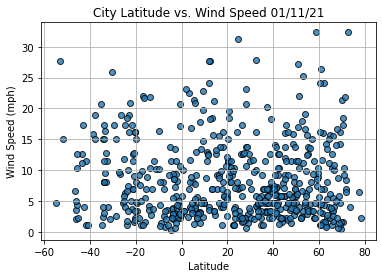

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()